# Fraud Transaction Detection Machine Learning

The objective is to classify the data transactions as either legitimate (class 0) or fradulent (class 1) using a machine learning model. Four machine learning models will be trained and tested to determine which will yield the best results:

- Decision Trees
- Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 70% 46.0M/66.0M [00:00<00:00, 121MB/s]
100% 66.0M/66.0M [00:00<00:00, 134MB/s]


In [10]:
! unzip creditcardfraud

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [11]:
cards = pd.read_csv('creditcard.csv')

cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
cards.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Checking for Missing Values

In [14]:
cards.isna().any().any()

False

In [15]:
cc = cards.corr() 

cc["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

## Amount

### Fraudulent Transaction Amount

In [16]:
#Creating a dataframe with all the fraud transactions
fraud_cards = cards[cards['Class']==1]

fraud_cards['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

Text(0.5, 0, 'Amount ($)')

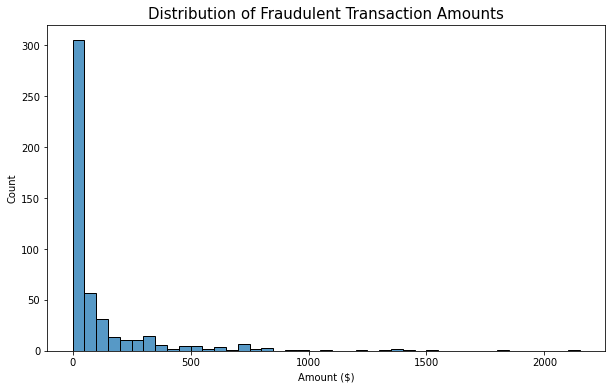

In [17]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=fraud_cards['Amount'], binwidth=50)
plt.title("Distribution of Fraudulent Transaction Amounts", fontsize=15)
ax.set_xlabel("Amount ($)")

Text(0.5, 1.0, 'Transaction Time vs. Amount')

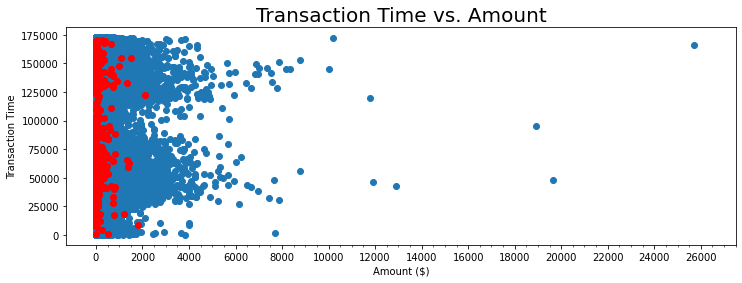

In [18]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y='Time',x='Amount', data=cards)
ax.scatter(y='Time',x='Amount', data=fraud_cards,facecolor="red")
major_xticks = np.arange(0, 28000, 2000)
minor_xticks = np.arange(0, 28000, 500)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Transaction Time")
ax.set_title('Transaction Time vs. Amount',fontsize=20)

# Train and Test the Model


In [19]:
#Calculating the no.of frauds/legitimate transactions
cards['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
#Calculating the percentage of frauds/legitimate transactions
round((cards['Class'].value_counts()/len(cards))*100,2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [21]:
cards_bal = cards[cards['Class']==1].sample(n=250)

cards_bal = cards_bal.append(cards[cards['Class']==0].sample(n=250))

In [22]:
#Calculating the percentage of frauds/legitimate transactions in the dataset
round((cards_bal['Class'].value_counts()/len(cards_bal))*100,2)

1    50.0
0    50.0
Name: Class, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

X = cards_bal.drop('Class',axis=1)
y = cards_bal['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

### Training a Decision Tree Model

In [24]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
decision_trees_predictions = dtree.predict(X_test)

## Random Forests

### Training the Random Forest Model

In [26]:
#Create an instance of the RandomForestClassifier class and fit it to our training data
from sklearn.ensemble import RandomForestClassifier

#n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
random_forests_predictions = rfc.predict(X_test)

## Comparing Performance

In [28]:
#Import Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

#Converting each of the classification reports into dictionaries
report_dt = classification_report(y_test,decision_trees_predictions , output_dict=True)
report_rf = classification_report(y_test,random_forests_predictions , output_dict=True)

In [29]:
model = {'Model Name':['Decision Trees', 'Random Forests'],
        'Accuracy':[report_dt['accuracy'], report_rf['accuracy']],
        'Precision':[report_dt['weighted avg']['precision'],report_rf['weighted avg']['precision']],
        'Recall':[report_dt['weighted avg']['recall'],report_rf['weighted avg']['recall']],
        'F1-Score':[report_dt['weighted avg']['f1-score'],report_rf['weighted avg']['f1-score']]}

model = pd.DataFrame(model)

model.round(2).sort_values(by=['Accuracy','Precision','Recall','F1-Score'],ascending=False)

,Model Name,Accuracy,Precision,Recall,F1-Score
1,Random Forests,0.94,0.94,0.94,0.94
0,Decision Trees,0.90,0.90,0.90,0.90


As seen above the <b>Random Forests Model</b> yields the best results so we will test the model against the original data from the original dataset to compare its performance.